In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']      #以防matplotlib绘图时，中文标题显示不出来
plt.rcParams['axes.unicode_minus'] = False
plt.rc('figure', figsize=(10, 10))
%matplotlib inline

In [4]:
users_data = pd.read_csv(r"C:\Users\dell\Desktop\users_data.csv",header = 0,index_col = None)

In [5]:
issues_data = pd.read_csv(r"C:\Users\dell\Desktop\issues_data.csv",header = 0,index_col = None)

In [65]:
users_data.sample(3)

,bio,blog,company,created_at,email,followers,following,hireable,id,location,login,name,organizations_url,public_repos,updated_at,url,company_top,uni_top
9216,NaN,NaN,NaN,2016-04-25 06:21:22+00:00,NaN,0,0,NaN,18653842,NaN,dellinger-zhang,NaN,https://api.github.com/users/dellinger-zhang/orgs,15,2018-12-12 17:06:41+00:00,https://api.github.com/users/dellinger-zhang,NaN,NaN
4671,NaN,NaN,NaN,2018-03-01 04:37:45+00:00,NaN,0,0,NaN,36944936,NaN,gzyrik,wolf,https://api.github.com/users/gzyrik/orgs,19,2019-03-28 03:48:20+00:00,https://api.github.com/users/gzyrik,NaN,NaN
6129,NaN,NaN,NaN,2016-06-19 12:07:37+00:00,NaN,0,0,NaN,20026684,NaN,Robot-M,NaN,https://api.github.com/users/Robot-M/orgs,3,2019-03-28 05:08:20+00:00,https://api.github.com/users/Robot-M,NaN,NaN


In [17]:
users_data.shape              #  这是近四万条有关关注996问题人员的信息数据

(39987, 16)

In [7]:
users_data.columns      #查看所有的列标题，总共有三十多个，并不是每个我们都有用

Index(['_id', 'avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

In [8]:
users_data.drop(columns = ['_id', 'avatar_url', 'events_url', 'followers_url', 'following_url',     #删除无用的列
                         'gists_url', 'gravatar_id', 'html_url', 'node_id', 'public_gists', 
                          'received_events_url', 'repos_url', 'site_admin', 'starred_url', 
                         'subscriptions_url', 'type'], inplace = True)

In [9]:
users_data.info()      #另一种查看列标的方法，我们保留了16 个可能会有用的列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 16 columns):
bio                  10174 non-null object
blog                 6517 non-null object
company              5470 non-null object
created_at           39987 non-null object
email                12729 non-null object
followers            39987 non-null int64
following            39987 non-null int64
hireable             2998 non-null object
id                   39987 non-null int64
location             11286 non-null object
login                39987 non-null object
name                 21224 non-null object
organizations_url    39987 non-null object
public_repos         39987 non-null int64
updated_at           39987 non-null object
url                  39987 non-null object
dtypes: int64(4), object(12)
memory usage: 4.9+ MB


看看保留的这些列，主要是：
用户简介、博客、所在单位、账号创建时间、email、关注者数、被关注者数、是否能雇用、ID、所在地址、名字、组织url、公开repos数、更新时间等

### 先来考虑一下保留的这些列，将它们视为变量的话，那用户简介、所在单位、所在地址、名字就属于定性变量；账号创建时间、关注者数、被关注者数、公开repos数和更新时间就可以看做定量变量。
     列出所有可以进行分析的角度：
     
     1、用户简介可以用来刻画人物画像，可以提炼出公共关键词都有哪些，占比如何；
     
     2、所在单位可以看看关注996问题的人大都来自哪些公司；
     
     3、账号创建时间，可以通过时间差了解大致入行的时间，或者可以约等于工作年限；
     
     4、关注者数，可以了解这些人在网络上的公开知名度如何，是否有些很大佬级的人物；
     
     5、所在地址就很直观能分析出这些人大都几种在哪些省份、哪些城市；
     
     6、被关注者数，我认为可以代表网络参与的活跃度；
     
     那就从这6个方面入手分析users_data数据：

In [11]:
issues_data.sample(5)             #这张表也有很多列，挑选些有用的保留：

,_id,assignee,assignees,author_association,body,closed_at,comments,comments_url,created_at,events_url,...,user.login,user.node_id,user.organizations_url,user.received_events_url,user.repos_url,user.site_admin,user.starred_url,user.subscriptions_url,user.type,user.url
9792,5c9cf53fff314fc01c0c4c52,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-27T13:24:23Z,https://api.github.com/repos/996icu/996.ICU/is...,...,luke3366,MDQ6VXNlcjQ4OTg5ODIz,https://api.github.com/users/luke3366/orgs,https://api.github.com/users/luke3366/received...,https://api.github.com/users/luke3366/repos,False,https://api.github.com/users/luke3366/starred{...,https://api.github.com/users/luke3366/subscrip...,User,https://api.github.com/users/luke3366
7908,5c9cf4daff314fc01c0c2d83,NaN,[],NONE,！！！！！！！,NaN,1,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T14:26:04Z,https://api.github.com/repos/996icu/996.ICU/is...,...,sourth-rain,MDQ6VXNlcjE5ODk3Nzc5,https://api.github.com/users/sourth-rain/orgs,https://api.github.com/users/sourth-rain/recei...,https://api.github.com/users/sourth-rain/repos,False,https://api.github.com/users/sourth-rain/starr...,https://api.github.com/users/sourth-rain/subsc...,User,https://api.github.com/users/sourth-rain
9729,5c9cf53eff314fc01c0c4b7e,NaN,[],NONE,楼下讨论下技术方案和开发安排呗,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-27T06:08:32Z,https://api.github.com/repos/996icu/996.ICU/is...,...,bigdong89,MDQ6VXNlcjE0MzY3NDc2,https://api.github.com/users/bigdong89/orgs,https://api.github.com/users/bigdong89/receive...,https://api.github.com/users/bigdong89/repos,False,https://api.github.com/users/bigdong89/starred...,https://api.github.com/users/bigdong89/subscri...,User,https://api.github.com/users/bigdong89
7156,5c9cf4caff314fc01c0c20e9,NaN,[],NONE,NaN,NaN,2,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-27T11:49:22Z,https://api.github.com/repos/996icu/996.ICU/is...,...,one-pupil,MDQ6VXNlcjIwNjMyODg5,https://api.github.com/users/one-pupil/orgs,https://api.github.com/users/one-pupil/receive...,https://api.github.com/users/one-pupil/repos,False,https://api.github.com/users/one-pupil/starred...,https://api.github.com/users/one-pupil/subscri...,User,https://api.github.com/users/one-pupil
3313,5c9cebb5ff314fc01c0bf43e,NaN,[],NONE,NaN,NaN,0,https://api.github.com/repos/996icu/996.ICU/is...,2019-03-28T06:56:10Z,https://api.github.com/repos/996icu/996.ICU/is...,...,HereComesLay,MDQ6VXNlcjI1Nzk1ODU4,https://api.github.com/users/HereComesLay/orgs,https://api.github.com/users/HereComesLay/rece...,https://api.github.com/users/HereComesLay/repos,False,https://api.github.com/users/HereComesLay/star...,https://api.github.com/users/HereComesLay/subs...,User,https://api.github.com/users/HereComesLay


In [12]:
issues_data = issues_data[['comments','created_at','id','title','updated_at','user.id']]

In [14]:
issues_data.sample(3)

,comments,created_at,id,title,updated_at,user.id
8793,6,2019-03-27T14:40:29Z,426000116,"坐标加拿大,955从没加过班的报道",2019-03-28T14:14:45Z,14866393
4714,0,2019-03-28T03:36:53Z,426281873,https://www.aliyun.com/acts/product-section-20...,2019-03-28T03:36:53Z,35736300
2075,0,2019-03-28T09:07:20Z,426375902,凑热闹啊,2019-03-28T09:07:20Z,34089199


In [19]:
issues_data.shape            #这是一万多条有关问题及其评论的数据

(10037, 6)

我们保留的有用列分别是：issue评论数、创建时间、ID、issue题目、更新时间、提问者ID

### issues_data表，对于我保留的仅仅六个列指标，或许我们可以分析：

    1、哪些题目的评论数量比较多；
    
    2、评论里提及最多的词汇有哪些，词云图考虑；
    
    3、相应，题目里提及最多的词汇有哪些，考虑词云图；

    好像就这些

# 一、对users_data表的分析：

In [80]:
users_data['created_at'] = pd.to_datetime(users_data['created_at'])       #先来转换时间格式
users_data['updated_at'] = pd.to_datetime(users_data['updated_at'])

##  这些关注者都有哪些显著标签：

In [23]:
import jieba                         #jieba是一个可以对字段进行分词操作的包
from collections import Counter     #Counter可以生成字典，键是不同的词，值是这些词出现的次数统计
from pyecharts import WordCloud

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [24]:
jieba.add_word('996')
jieba.add_word('996制度')
jieba.add_word('ICU')

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 1.386 seconds.
DEBUG:jieba:Loading model cost 1.386 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [26]:
test = open(r"C:\Users\dell\Desktop\11.txt",'r').read()
swords = jieba.lcut(test)

In [27]:
def plot_word_cloud(data, swords):
    text = ''.join(data['bio'].astype('str'))
    words = jieba.lcut(text)
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [29]:
swords.extend(['the', 'is', 'and', 'of', 'be', 'to', 'in', 'for', 'from', 'am'])
plot_word_cloud(users_data, swords=swords)

## 关注996制度话题的人大都来自哪些company:

In [32]:
users_data['company'].value_counts()[:100].index        #看看排名前100的公司名字有哪些，可以看到还有很多的大学

Index(['Tencent', 'Baidu', 'Alibaba', 'Zhejiang University', 'JD',
       'Tsinghua University', 'Shanghai Jiao Tong University', 'baidu',
       'UESTC', 'Peking University', 'Nanjing University', 'None', 'SJTU',
       'none', 'Netease', 'China', 'Wuhan University', 'USTC', 'BUPT',
       '@Alibaba', 'ZJU', 'ThoughtWorks', 'NetEase', 'alibaba',
       'Fudan University', '@Tencent', 'Harbin Institute of Technology',
       'meituan', 'HUST', '百度', 'Bytedance', 'Xidian University',
       'Beijing Institute of Technology', '@alibaba', 'JD.COM',
       'Alibaba Group', 'Beihang University', 'baidu.com',
       'Beijing University of Posts and Telecommunications', 'Alipay',
       'Alibaba Inc.', 'SYSU', 'Carnegie Mellon University', 'NJU', 'JD.com',
       'free', 'eleme', 'Microsoft', 'Freelancer', 'no', 'tencent', 'DiDi',
       'South China University of Technology', 'Google', 'HIT',
       'East China Normal University', 'Southeast University', 'BUAA',
       'Neusoft', 'Sun Yat-se

先对提名前10的各个公司统一一下名称：

In [46]:
def get_company(data):
    for com in ['encent', '腾讯']:
        if com in data:
            return '腾讯'
    for com1 in ['aidu', '百度']:
        if com1 in data:
            return '百度'
    for com2 in ['Alibaba','libaba', '淘宝', 'aobao', 'lipay', '阿里巴巴', 'liyun', '阿里云','alibaba']:
        if com2 in data:
            return '阿里系'
    for com3 in ['JD', 'jd', '京东']:
        if com3 in data:
            return '京东'
    for com4 in ['etease', 'etEase', '网易','Netease','NetEase']:
        if com4 in data:
            return '网易'
    for com5 in ['eituan', '美团']:
        if com5 in data:
            return '美团'
    for com6 in ['ytedance', '字节', '头条']:
        if com6 in data:
            return '头条'
    for com7 in ['eleme', '饿了么']:
        if com7 in data:
            return '饿了么'
    for com8 in ['uawei', '华为']:
        if com8 in data:
            return '华为'
    for com9 in['didi', 'DiDi', '滴滴', '嘀嘀']:
        if com9 in data:
            return '滴滴'

In [47]:
users_data['company_top'] = users_data.loc[users_data['company'].notna(), 'company'].apply(get_company)   #增加一列统一公司名称的列

In [48]:
users_data.info()    #可以看到增加的列‘company_top’在最后

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39987 entries, 0 to 39986
Data columns (total 17 columns):
bio                  10174 non-null object
blog                 6517 non-null object
company              5470 non-null object
created_at           39987 non-null datetime64[ns, UTC]
email                12729 non-null object
followers            39987 non-null int64
following            39987 non-null int64
hireable             2998 non-null object
id                   39987 non-null int64
location             11286 non-null object
login                39987 non-null object
name                 21224 non-null object
organizations_url    39987 non-null object
public_repos         39987 non-null int64
updated_at           39987 non-null datetime64[ns, UTC]
url                  39987 non-null object
company_top          628 non-null object
dtypes: datetime64[ns, UTC](2), int64(4), object(11)
memory usage: 5.2+ MB


In [49]:
top10_com = users_data['company_top'].value_counts()
top10_com                                                    #果然每个公司都很响当当

阿里系    148
腾讯     126
百度     108
京东      69
网易      50
美团      46
头条      35
滴滴      17
华为      16
饿了么     13
Name: company_top, dtype: int64

用条形图更为直观的展示出来：

In [40]:
a = top10_com.index
b = top10_com.values

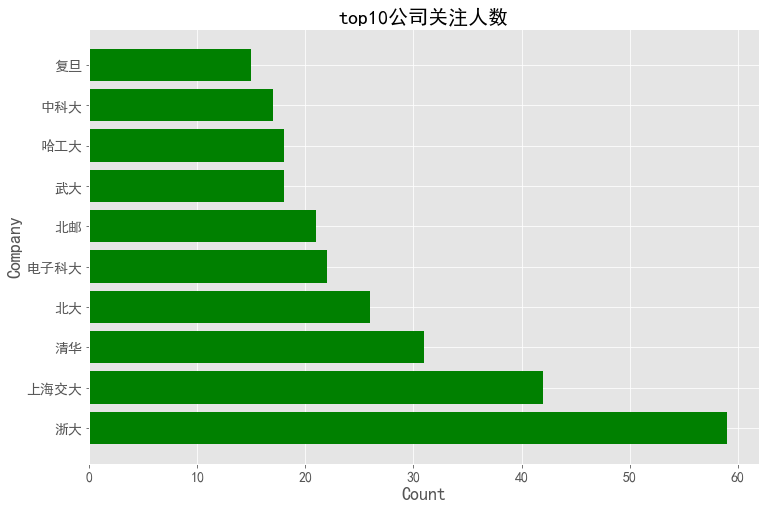

In [61]:
plt.figure(figsize = (12,8))
plt.barh(a,b,color = 'g')
plt.title('top10公司关注人数',fontsize =20 )
plt.ylabel('Company',fontsize = 18)
plt.xlabel('Count',fontsize = 18)
plt.tick_params(labelsize = 14)
plt.show()

再对提名前10 的大学进行名称统一：

In [57]:
def get_uni(data):
    for uni in ['hejiang', 'ZJU', 'zju', '浙江大学', '浙大']:
        if uni in data:
            return '浙大'
    for uni in ['Peking University','北大','北京大学','PKU' ]:
        if uni in data:
            return '北大'
    for uni2 in ['singhua', '清华大学']:
        if uni2 in data:
            return '清华'
    for uni3 in ['Shanghai Jiao Tong', 'SJTU', '上海交大', '上海交通大学']:
        if uni3 in data:
            return '上海交大'
    for uni4 in ['UESTC', '电子科大', '电子科技大学']:
        if uni4 in data:
            return '电子科大'
    for uni5 in ['Wuhan', '武大', '武汉大学']:
        if uni5 in data:
            return '武大'
    for uni6 in ['USTC', '中科大', '中国科学技术大学']:
        if uni6 in data:
            return '中科大'
    for uni7 in ['Fudan', '复旦']:
        if uni7 in data:
            return '复旦'
    for uni8 in ['arbin', '哈']:
        if uni8 in data:
            return '哈工大'
    for uni9 in ['BUPT', '北邮', '北京邮电']:
        if uni9 in data:
            return '北邮'

In [58]:
users_data['uni_top'] = users_data.loc[users_data['company'].notna(), 'company'].apply(get_uni)

In [59]:
top10_uni = users_data['uni_top'].value_counts()
top10_uni

浙大      59
上海交大    42
清华      31
北大      26
电子科大    22
北邮      21
武大      18
哈工大     18
中科大     17
复旦      15
Name: uni_top, dtype: int64

同样用条形图展示一下：

In [60]:
a = top10_uni.index
b = top10_uni.values

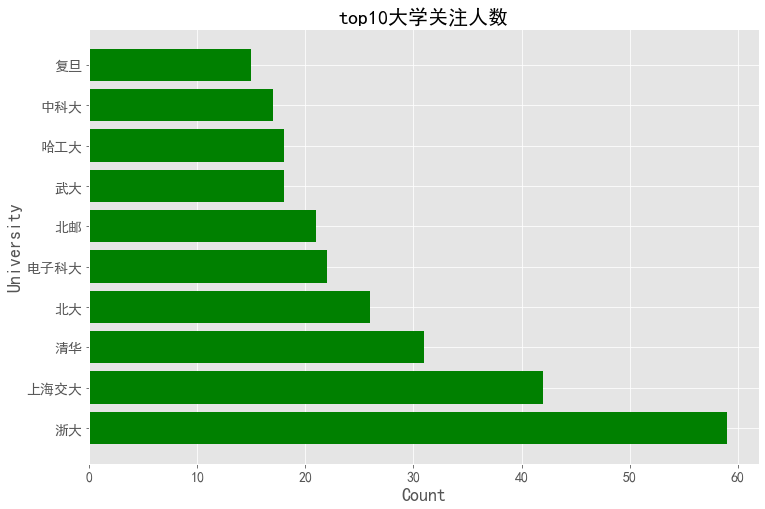

In [62]:
plt.figure(figsize = (12,8))
plt.barh(a,b,color = 'g')
plt.title('top10大学关注人数',fontsize =20 )
plt.ylabel('University',fontsize = 18)
plt.xlabel('Count',fontsize = 18)
plt.tick_params(labelsize = 14)
plt.show()

## 看一下关注者的大致入行年限：

In [85]:
pd.to_datetime("2019-10-23 13:12:00").tz_localize('UTC')

Timestamp('2019-10-23 13:12:00+0000', tz='UTC')

In [88]:
users_data['created_at'].head(5)        #时区都不一样

0   2016-07-12 05:17:50+00:00
1   2016-08-27 14:04:23+00:00
2   2015-06-19 13:57:11+00:00
3   2017-01-14 03:30:31+00:00
4   2017-12-31 03:49:37+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [ ]:
users_data['time'] = pd.to_datetime('2019-03-28')- users_data['created_at'].tz_convert('China\Beijing')

经计算平均年限为3.9年

## 看看这些人在网络上的粉丝数：

In [95]:
users_data[users_data['followers'] > 100].shape[0]        #粉丝数大于100的有598位

598

In [96]:
users_data[users_data['followers'] > 500].shape[0]       #粉丝数大于500的有110位

110

In [97]:
users_data[users_data['followers'] > 1000].shape[0]      #粉丝数大于1000的有47位

47

或许我们可以画个散点图表示一下知名度分布：

In [103]:
bins = [0,50,100,300,600,1000]
followers_list = users_data['followers']
followers_cut = pd.cut(followers_list,bins)

In [104]:
pd.value_counts(followers_cut)

(0, 50]        19498
(50, 100]        601
(100, 300]       409
(300, 600]        98
(600, 1000]       44
Name: followers, dtype: int64

In [105]:
x = users_data.loc[users_data['followers']<3000,'followers']
y = pd.Series(np.arange(users_data.shape[0] - 10))

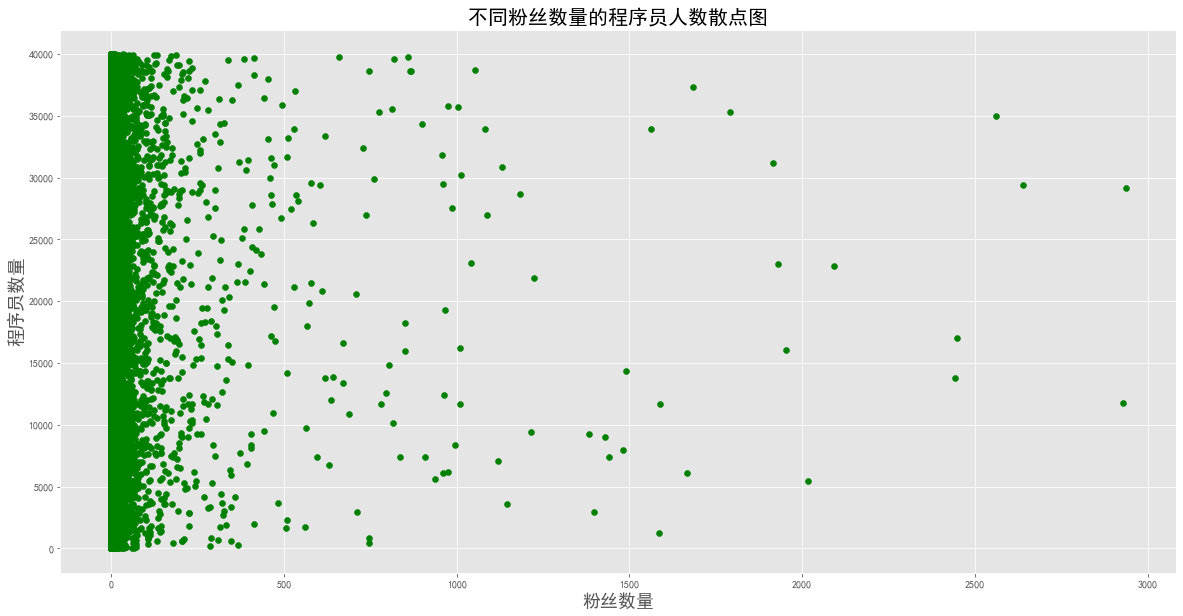

In [107]:
plt.figure(figsize = (20,10))
plt.scatter(x,y,color = 'g')
plt.title('不同粉丝数量的程序员人数散点图',fontsize = 20)
plt.xlabel('粉丝数量',fontsize = 18)
plt.ylabel('程序员数量',fontsize = 18)
plt.show()

用饼图观察应该更直观：

In [108]:
x1 = [94,3,2,0.6,0.4]
x2 = [51,36,9,4]

In [109]:
labels1 = ['0-50','50-100','100-300','300-600','600-1000']
labels2 = ['50-100','100-300','300-600','600-1000']

In [110]:
explode1 = (0.1,0,0,0,0)
explode2 = (0.1,0,0,0)

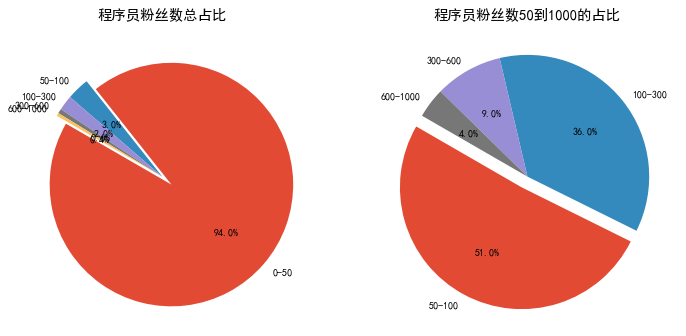

In [111]:
fig,axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)
ax1,ax2 = axes.ravel()
ax1.pie(x1,explode=explode1,labels=labels1,autopct='%1.1f%%',shadow=False,startangle=150)
ax1.set_title("程序员粉丝数总占比")
ax2.pie(x2,explode=explode2,labels=labels2,autopct='%1.1f%%',shadow=False,startangle=150)
ax2.set_title("程序员粉丝数50到1000的占比")
plt.show() 

看看有多少粉丝数大于3000的大佬：

In [113]:
users_data.loc[users_data['followers'] > 3000, ['login', 'followers','url', 'bio']]

,login,followers,url,bio
6851,vczh,13793,https://api.github.com/users/vczh,Programmer with no technology bias. Main contr...
7092,chokcoco,4130,https://api.github.com/users/chokcoco,国服第一切图仔
7193,singwhatiwanna,6632,https://api.github.com/users/singwhatiwanna,NaN
8142,Ovilia,8043,https://api.github.com/users/Ovilia,Creative Web Developer & Designer
13325,wizardforcel,5522,https://api.github.com/users/wizardforcel,我自成佛自度我，佛度凡尘我度佛。
19710,yanhaijing,3834,https://api.github.com/users/yanhaijing,知名技术博主，开源达人，《React状态管理与同构实战》作者，yanhaijing.com
21603,liuyubobobo,3392,https://api.github.com/users/liuyubobobo,NaN
27695,draveness,3128,https://api.github.com/users/draveness,Go / Rails / Rust
30008,Germey,3520,https://api.github.com/users/Germey,"Talk is cheap, show me the code."
39663,88250,7006,https://api.github.com/users/88250,开源程序员，自由职业者 🎸 Stairway To Heaven | 再见理想 | 浮夸\r\n


## 关注者主要来自哪些城市和省份：

In [114]:
users_data.location.value_counts()[:100].index

Index(['China', 'Beijing', 'Shanghai', 'Beijing, China', 'beijing',
       'Shanghai, China', '北京', 'shanghai', 'china', 'BeiJing', 'Hangzhou',
       'Beijing,China', 'ShangHai', 'Hangzhou, China', '上海', 'Shenzhen, China',
       'Shenzhen', 'shenzhen', 'Beijing China', '深圳', 'hangzhou', '杭州',
       'Guangzhou', 'HangZhou', 'ShenZhen', 'Shanghai,China',
       'Guangzhou, China', 'Shanghai China', 'Chengdu', 'Chengdu, China',
       'GuangZhou', '中国', 'Nanjing, China', '广州', 'chengdu', 'Shenzhen,China',
       'Nanjing', 'guangzhou', '成都', 'Hangzhou,China', 'ChengDu',
       'Guangzhou,China', 'ShangHai, China', 'Singapore', 'China Beijing',
       'Hong Kong', 'Wuhan', 'nanjing', 'Beijing.China', 'HangZhou China',
       'CN', 'wuhan', 'Shenzhen China', 'NanJing', 'Hangzhou China', '浙江杭州',
       'Earth', 'ShenZhen,China', 'Xi'an', 'HangZhou, China', 'ShenZhen China',
       'WuHan', 'Wuhan, China', 'Chengdu,China', 'Chengdu China',
       'Nanjing,China', '南京', 'Hangzhou, Zhejiang,

In [115]:
def get_location(data):
    for com in ['Beijing', 'Beijing, China','beijing','北京','BeiJing','BJ','Beijing China','China Beijing','Beijing.China',
               'BeiJing,China','Bei Jing','beijing,china','BeiJing, China']:
        if com in data:
            return '北京'
    for com1 in ['Shanghai','Shanghai, China','shanghai','上海','Shanghai,China','Shanghai China','ShangHai,China',
                 'SH','ShangHai,China','ShangHai China']:
        if com1 in data:
            return '上海'
    for com2 in ['Chongqing, China','重庆']:
        if com2 in data:
            return '重庆'
    for com3 in ['Chengdu, China','Chengdu','chengdu','成都','ChengDu','Chengdu China','四川成都']:
        if com3 in data:
            return '四川'
    for com4 in ['Hangzhou','Hangzhou, China','hangzhou','杭州','HangZhou','Hangzhou,China','HangZhou China','浙江杭州',
                 'Hangzhou China','HangZhou, China','Hangzhou, Zhejiang, China','HangZhou,China']:
        if com4 in data:
            return '浙江'
    for com5 in ['Shenzhen, China', 'Shenzhen','shenzhen','深圳','Guangzhou','ShenZhen','Guangzhou, China','GuangZhou','广州',
                 'Shenzhen,China','guangzhou','Guangzhou,China', 'Shenzhen China','ShenZhen,China','ShenZhen China','ShenZhen, China',
                'Guangzhou China','GuangZhou China','广东深圳','GuangZhou, China']:
        if com5 in data:
            return '广东'
    for com6 in ['Nanjing, China', 'Nanjing', 'nanjing','NanJing','Nanjing,China','南京','Suzhou, China','Suzhou',
                 '苏州','Nanjing,Jiangsu, China']:
        if com6 in data:
            return '江苏'
    for com7 in ['Hong Kong']:
        if com7 in data:
            return '香港'
    for com8 in ['Wuhan', 'wuhan','Wuhan, China','WuHan','Wuhan China','武汉','Wuhan,China']:
        if com8 in data:
            return '湖北'
    for com9 in["Xi'an", "Xi'an China"]:
        if com9 in data:
            return '陕西'
    for com10 in['Xiamen, China']:
        if com10 in data:
            return '福建'            
    for com11 in['Dalian']:
        if com11 in data:
            return '辽宁'

In [116]:
users_data['top_city'] = users_data.loc[users_data['location'].notna(),'location'].apply(get_location)

In [118]:
users_data.top_city.value_counts()

北京    2353
上海    1414
广东    1367
浙江     933
四川     503
江苏     378
湖北     262
陕西      79
重庆      45
辽宁      34
香港      31
福建      13
Name: top_city, dtype: int64

In [120]:
from pyecharts import Map
province_distribution = { '北京': 2353,'辽宁': 34,'上海': 1414, '江苏': 378,'浙江':933,'广东': 1367,
                         '湖北': 262,'陕西': 79,'四川': 503,'重庆':45,'福建':13,'香港':31}
provice = list(province_distribution.keys())
values = list(province_distribution.values())
map = Map("中国地图", '中国地图', width=1200, height=600)
map.add("", provice, values, visual_range=[0, 3000], maptype='china', is_visualmap=True,
        visual_text_color='#000')
map.render(path="中国地图.html")        #生成了一个文件

# 对issues_data表的分析：

In [121]:
issues_data.updated_at = pd.to_datetime(issues_data.updated_at)     #同样先对时间进行转换

## 评论最多的前十个标题：

In [122]:
issues_data.iloc[issues_data['comments'].nlargest(20).index][['title','comments']]

,title,comments
2553,Discussion thread,1243
2610,"求个""工作 996，生病 ICU"" 壁纸 打算做电脑壁纸",62
6246,以后，简历上可以写， 参加过2000+ star 开源项目。,53
8304,我不懂法律，但是我想知道到底违法不？,39
1121,996.ICU能进star榜历史前十吗？,37
5833,关于 反996制度运动 的一些实际性建议,30
5870,一边拿着公司的钱，还一边挖苦公司，吃相真难看,30
3672,今晚加班，到10W删库。,26
6253,96年萌妹程序员找男盆友,25
5161,给袁博磕头,24


## 看看评论内容的高频词：

In [123]:
def plot_word_cloud(data, swords):
    text = ''.join(data['title'])
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [124]:
plot_word_cloud(issues_data,swords = swords)